In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
coordinates = lat_lngs[:100]

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates[:10]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    

young uy
taoudenni ml
tidore id
kholm-zhirkovskiy ru
arraial do cabo br
nikolskoye ru
rikitea pf
rikitea pf
qaanaaq gl
vaini to


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

82

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 2 | young
Processing Record 2 of Set 2 | taoudenni
Processing Record 3 of Set 2 | tidore
City not found. Skipping...
Processing Record 4 of Set 2 | kholm-zhirkovskiy
Processing Record 5 of Set 2 | arraial do cabo
Processing Record 6 of Set 2 | nikolskoye
Processing Record 7 of Set 2 | rikitea
Processing Record 8 of Set 2 | qaanaaq
Processing Record 9 of Set 2 | vaini
Processing Record 10 of Set 2 | carnarvon
Processing Record 11 of Set 2 | banda aceh
Processing Record 12 of Set 2 | mar del plata
Processing Record 13 of Set 2 | port hardy
Processing Record 14 of Set 2 | khandyga
Processing Record 15 of Set 2 | port elizabeth
Processing Record 16 of Set 2 | chuy
Processing Record 17 of Set 2 | tuktoyaktuk
Processing Record 18 of Set 2 | farafangana
Processing Record 19 of Set 2 | mataura
Processing Record 20 of Set 2 | morant bay
Processing Record 21 of Set 2 | jackson
Processing Record 22 of Set 2 | p

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
print(city_data_df.shape)
city_data_df.head(10)

(76, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Young,-32.6833,-57.6333,79.29,29,0,13.58,UY,2022-11-08 18:42:01
1,Taoudenni,22.6783,-3.9836,81.21,13,99,7.92,ML,2022-11-08 18:42:02
2,Kholm-Zhirkovskiy,55.5189,33.4731,41.76,93,79,10.25,RU,2022-11-08 18:42:02
3,Arraial Do Cabo,-22.9661,-42.0278,73.26,68,75,9.22,BR,2022-11-08 18:42:03
4,Nikolskoye,59.7035,30.7861,46.29,85,100,10.09,RU,2022-11-08 18:41:21
5,Rikitea,-23.1203,-134.9692,75.13,90,65,15.41,PF,2022-11-08 18:37:22
6,Qaanaaq,77.4840,-69.3632,-8.48,74,31,6.89,GL,2022-11-08 18:41:10
7,Vaini,-21.2000,-175.2000,75.36,78,20,8.05,TO,2022-11-08 18:41:05
8,Carnarvon,-24.8667,113.6333,65.98,69,0,10.80,AU,2022-11-08 18:42:03
9,Banda Aceh,5.5577,95.3222,79.07,80,100,3.29,ID,2022-11-08 18:42:04


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Young,UY,2022-11-08 18:42:01,-32.6833,-57.6333,79.29,29,0,13.58
1,Taoudenni,ML,2022-11-08 18:42:02,22.6783,-3.9836,81.21,13,99,7.92
2,Kholm-Zhirkovskiy,RU,2022-11-08 18:42:02,55.5189,33.4731,41.76,93,79,10.25
3,Arraial Do Cabo,BR,2022-11-08 18:42:03,-22.9661,-42.0278,73.26,68,75,9.22
4,Nikolskoye,RU,2022-11-08 18:41:21,59.7035,30.7861,46.29,85,100,10.09
5,Rikitea,PF,2022-11-08 18:37:22,-23.1203,-134.9692,75.13,90,65,15.41
6,Qaanaaq,GL,2022-11-08 18:41:10,77.4840,-69.3632,-8.48,74,31,6.89
7,Vaini,TO,2022-11-08 18:41:05,-21.2000,-175.2000,75.36,78,20,8.05
8,Carnarvon,AU,2022-11-08 18:42:03,-24.8667,113.6333,65.98,69,0,10.80
9,Banda Aceh,ID,2022-11-08 18:42:04,5.5577,95.3222,79.07,80,100,3.29


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/08/22'

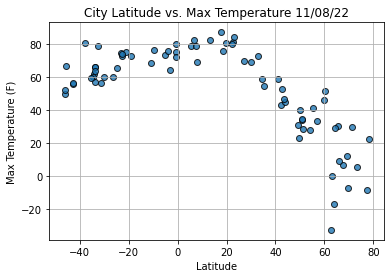

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### 6.3.2 Plot Latitude vs. Humidity

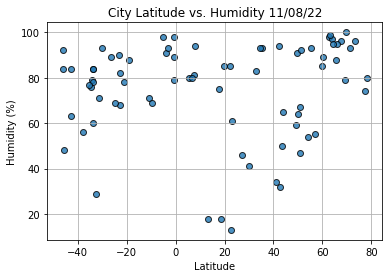

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

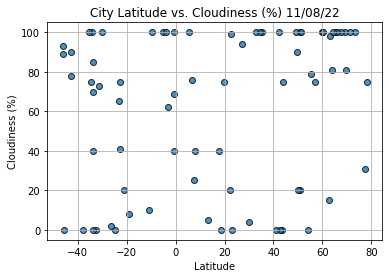

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

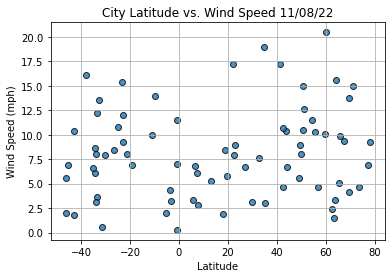

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()